# YouUniverse
_[Large-Scale Channel and Video Metadata from English-Speaking YouTube]_

- Data is made available through [Zenodo](https://doi.org/10.5281/zenodo.4650046).
- For context and an explanation of how data collection was done, see [the paper](https://arxiv.org/abs/2012.10378).
- Please cite this dataset if you use it:

~~~bibtex
@inproceedings{ribeiro2021youniverse,
      title={YouNiverse: Large-Scale Channel and Video Metadata from English-Speaking YouTube},
      author={Ribeiro, Manoel Horta and West Robert},
      year={2021},
      booktitle={{Proceedings of the 15th International AAAI Conference
                  on Weblogs and Social Media (ICWSM'21)}}
}
~~~

## Channel Data

The file `df_channels_en.tsv.gz` contains data related to channels.
It aggregates both basic stats from channels obtained from `channelcrawler.com`,
as well as rankings obtained from `socialblade.com`.

- `category_cc`: category of the channel.
- `join_date`: join date of the channel.
- `channel`: channel id.
- `name_cc`: name of the channel.
- `subscribers_cc`: number of subscribers.
- `videos_cc`: number of videos.
- `subscriber_rank_sb`: rank in terms of number of subscribers.
- `weights`: weights cal

| category_cc | join_date  | channel                  | name_cc      | subscribers_cc | videos_cc | subscriber_rank_sb |  weights |
|:------------|:-----------|:-------------------------|:-------------|---------------:|----------:|-------------------:|---------:|
| Gaming      | 2015-08-26 | UCi_AR7WqvXa6LEnRn_7ES7A | Thunder Play |          11500 |       849 |             877395 |  11.175  |
| Sports      | 2016-02-04 | UCgVlxaBsBkmMh2SUgrzG1ZQ | Thunder Prod |          76000 |        61 |             198340 |  5.5295  |
| Music       | 2013-09-14 | UCNBYpqbD64tkuuFS-NNhkfQ | Thunder Rain |          33700 |        58 |             382980 |  6.5855  |


## Time Series Data

The file `df_timeseries_en.csv.gz` contains data related to time series.
We have a data point for each channel and each week:

- `channel`: channel id.
- `category`: category of the channel as assigned by `socialblade.com` according to the last 10 videos at time of crawl.
- `datetime`: Week related to the data point.
- `views`: Total number of views the channel had this week.
- `delta_views`: Delta views obtained this week.
- `subs`: Total number of subscribers the channel had this week.
- `delta_subs`: Delta subscribers obtained this week.
- `videos`: Total number of videos the channel had this week.
- `delta_videos`: Delta videos obtained this week.
- `activity`: Number of videos published in the last 15 days.

| channel                  | category           | datetime   | views   | delta_views | subs | delta_subs | videos | delta_videos | activity |
|:-------------------------|:-------------------|:-----------|--------:|------------:|-----:|-----------:|-------:|-------------:|---------:|
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-03 | 202495  |           0 |  650 |   0        |      5 |            0 |        3 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-10 | 394086  |      191591 | 1046 | 396        |      6 |            1 |        1 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-17 | 835394  |      441308 | 1501 | 456        |      6 |            0 |        1 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-17 | 835394  |      441308 | 1501 | 456        |      6 |            0 |        1 |

Some facts about it:

- This file contains 18,872,499 data points belonging to 153,550 channels.
- In average, it contains 2.8 years of data for each channel
- Data goes from early January 2015 to the end of September 2019. Not all channels have the complete time frame.
- Additionally we filtered all channels that were not in english given their video metadata (see `Raw Channels').

## Video Metadata

The file `yt_metadata_en.jsonl.gz` contains metadata data related to ~73M videos from ~137k channels.
Below we show the data recorded for each of the video

    {
        'categories': 'People & Blogs',
        'channel_id': 'UCzzYnZ8GIzfB1Vr3hk2Nj9Q',
        'crawl_date': '2019-11-02 09:01:05.328421',
        'description': 'See more at http://www.standstrongcompany.com Fitness Keep it healthy at (...)',
        'dislike_count': 8,
        'display_id': 'x72dBgcVPFI',
        'duration': 187,
        'like_count': 91,
        'tags': 'Tiger Fitness,TigerFitness,fitness,workout,diet,health,pre workout,ab workout,(...)',
        'title': 'Slingshot for Squats? | Tiger Fitness',
        'upload_date': '2019-04-21 00:00:00',
        'view_count': 2559
    }
    
Some facts about it:
- This data was crawled from YouTube between 2019-10-29 and 2019-11-23.
- It contains 72,924,794 videos created between 2005-05-24 to 2019-11-20.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/kadabros/notebooks')

In [3]:
import gzip
import json
import matplotlib.pyplot as plt
import os, sys
import pandas as pd
import pyarrow.ipc as ipc
import pyarrow.feather as feather
import seaborn as sns

In [4]:
NOTEBOOK_PATH = os.getcwd()
DIR_PATH = os.path.dirname(NOTEBOOK_PATH)
DATA_PATH = os.path.join(DIR_PATH, "data_youniverse")
UTILS_PATH = os.path.join(DIR_PATH, "utils")

# append utils path and import utils
sys.path.append(UTILS_PATH)
from ploting import *
from loading import *

CATEGORY = "People & Blogs"

In [15]:
df_channels_en = pd.read_csv(os.path.join(DATA_PATH, "df_channels_en.tsv.gz"), compression="infer", sep="\t")
df_timeseries_en = pd.read_csv(f"{DATA_PATH}/df_timeseries_en.tsv.gz", compression="infer", sep="\t") # 30 sec

# Distribution of Categories in the YouNiverse Dataset

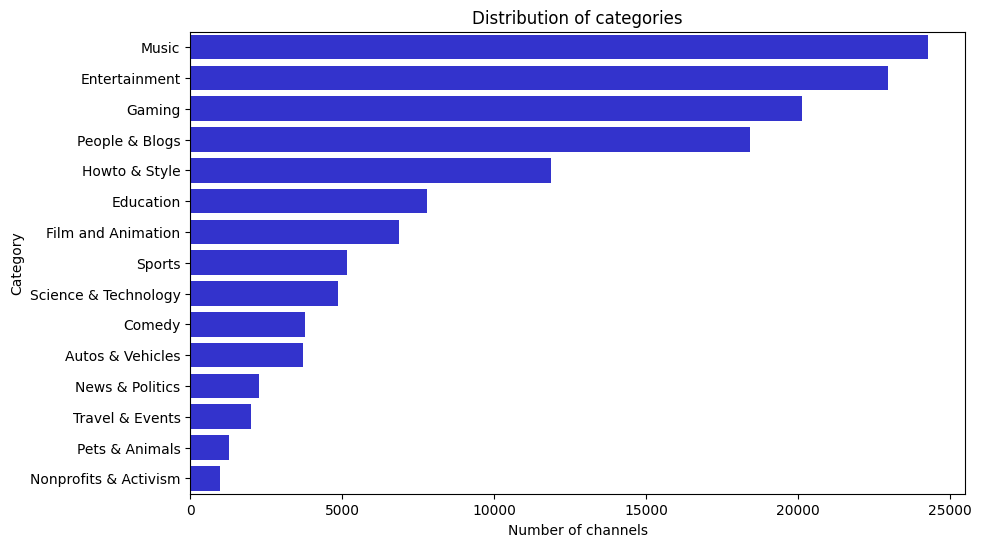

In [6]:
category_value_counts = df_channels_en["category_cc"].value_counts()

# Plot distribution of categories, emphasis on the People & Blogs category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_value_counts.values, y=category_value_counts.index, orient="h", color="b", saturation=0.6)
plt.title("Distribution of categories")
plt.xlabel("Number of channels")
plt.ylabel("Category")
plt.show();

# Abstract
In this data analysis story, we will focus on exploring the dynamics of the "People & Blogs" category on YouTube from 2012 to 2019. The analysis delves into the evolution of subcategories within "People & Blogs," investigates how YouTube channels strategically navigate and benefit from subcategory trends, and explores the specific evolution of the Vlog subcategory. Our aim is to understand when and why channels eventually have transitioned into or out of the People & Blogs categories over the past decade.


## Load, Filter, and Save yt_metadata_People&Blogs

In [ ]:
CATEGORY_FILE_NAME = ''.join(CATEGORY.split(" ")).lower()
CATEGORY_FILE_PATH = os.path.join(DATA_PATH, f"df_channels_{CATEGORY_FILE_NAME}.tsv.gz")

yt_metadata_filtered = load_and_filter_jsonl_gz_file_by_chunks(os.path.join(DATA_PATH, "yt_metadata_en.jsonl.gz"), CATEGORY)
yt_metadata_filtered.to_csv(CATEGORY_FILE_PATH, index=False, compression="gzip") # 17m 14s | category = People & Blogs
yt_metadata_filtered.head()

# Research Questions (CONCEPTS so far...)
- How does a YouTube subcategory's popularity within "People & Blogs" evolve over time?
- How do YouTube channels within the "People & Blogs" category leverage the popularity of their respective subcategories?
- What insights can be gained from the evolution of Vlog videos within "People & Blogs" over time (considering factors such as length, views, likes, dislikes, and comments)?
- How did Youtube channels morphing either into or out of the People & Blogs categories fare after the transition ? E.g. how was a channel's popularity affected after migrating from Gaming to Vlog ?

In [7]:
yt_metadata_filtered = pd.read_csv(os.path.join(DATA_PATH, "df_channels_people&blogs.tsv.gz"), compression="infer")
yt_metadata_filtered.dtypes

categories        object
channel_id        object
crawl_date        object
dislike_count    float64
display_id        object
duration           int64
like_count       float64
tags              object
upload_date       object
view_count       float64
dtype: object

In [8]:
# convert upload_date to datetime
yt_metadata_filtered['upload_date'] = yt_metadata_filtered['upload_date'].astype('datetime64[ns]')

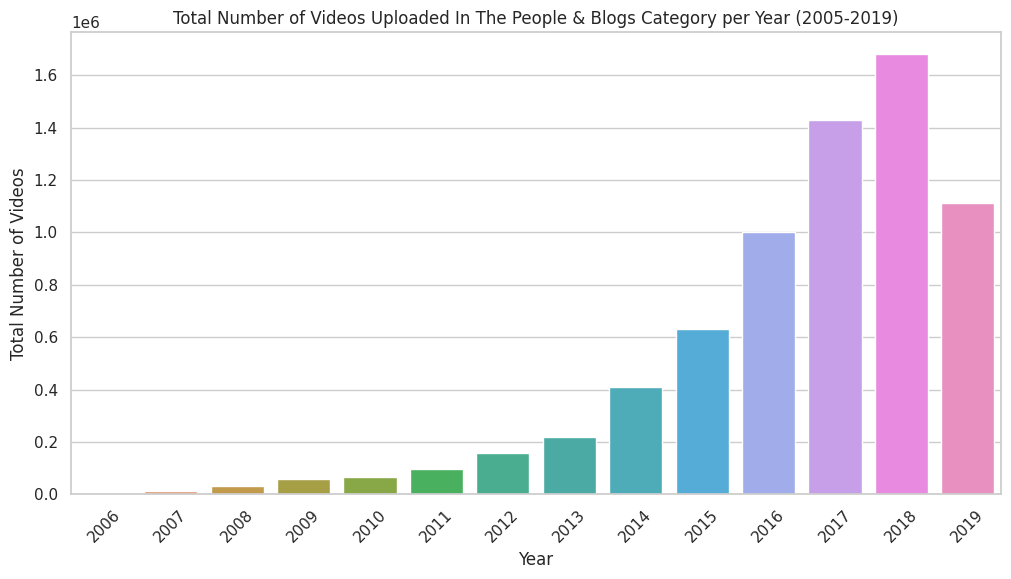

In [9]:
video_count = yt_metadata_filtered.groupby(pd.Grouper(key="upload_date", freq="W")).count().channel_id

yearly_totals = video_count.groupby(video_count.index.year).sum()

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_totals.index, y=yearly_totals.values)
plt.xticks(rotation=45)
plt.ylabel("Total Number of Videos")
plt.xlabel("Year")
plt.title("Total Number of Videos Uploaded In The People & Blogs Category per Year (2005-2019)")
plt.show()

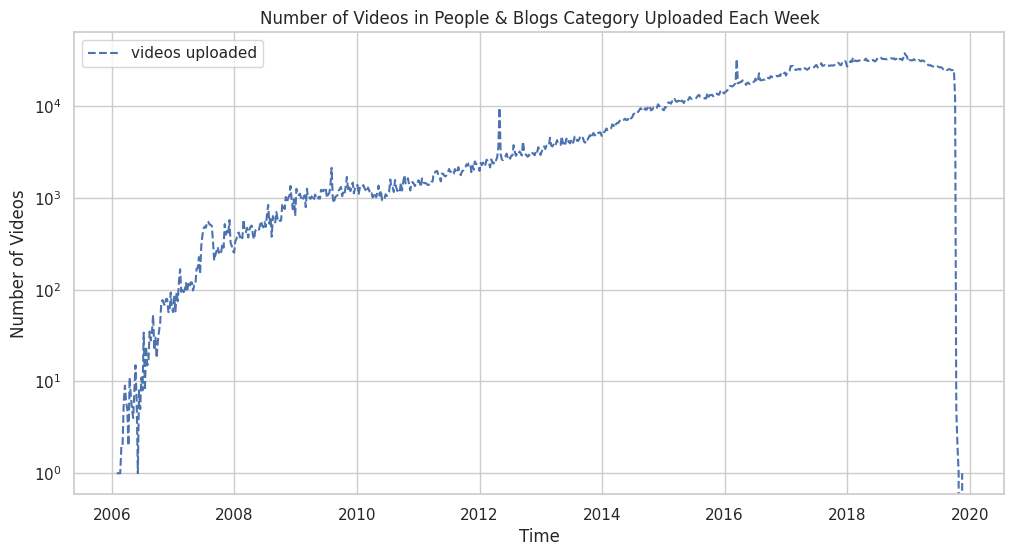

In [10]:
sns.set(style="whitegrid")  # Setting the style using seaborn
plt.figure(figsize=(12, 6))  # Creating a figure with a specific size
sns.lineplot(data=video_count, linestyle="--", label="videos uploaded")
plt.yscale("log")  # Setting the y-axis to logarithmic scale
plt.ylabel("Number of Videos")  # Setting y-axis label
plt.xlabel("Time")  # Setting x-axis label
plt.title("Number of Videos in People & Blogs Category Uploaded Each Week")  # Setting the title
plt.show()  # Displaying the plot

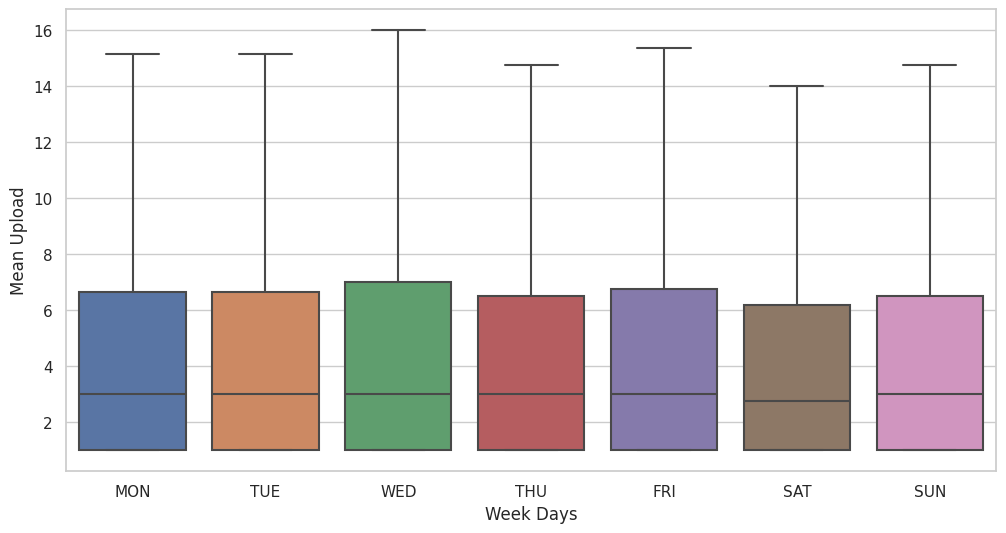

In [11]:
yt_metadata_filtered["yearNumber"] = yt_metadata_filtered["upload_date"].dt.year
yt_metadata_filtered["weekNumber"] = yt_metadata_filtered["upload_date"].dt.weekday
vd_cnt_by_id_wk = (
    yt_metadata_filtered.groupby(["channel_id", "weekNumber", "yearNumber"])
    .count()
    .categories.unstack()
    .reset_index()
)
vd_cnt_by_id_wk.columns.name = None
vd_cnt_by_id_wk["mean_upload"] = vd_cnt_by_id_wk.iloc[:, 2:].mean(axis=1, skipna=True)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

labels = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]
ax = sns.boxplot(
    x="weekNumber", y="mean_upload", data=vd_cnt_by_id_wk, showfliers=False
).set(xlabel="Week Days", ylabel="Mean Upload", xticklabels=labels)

### How does a YouTube subcategory's popularity within "People & Blogs" evolve over time?


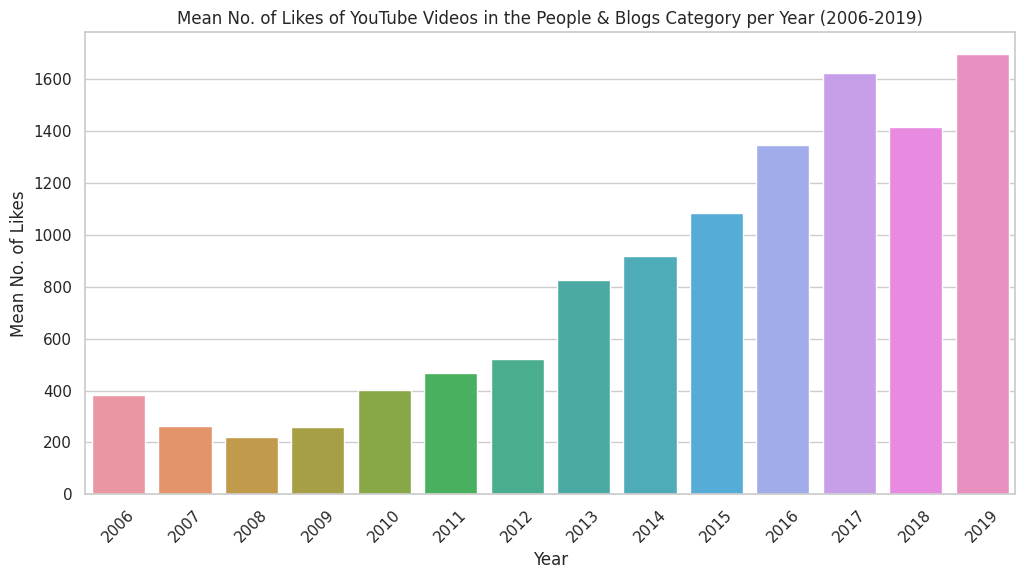

In [12]:
df_likes = yt_metadata_filtered.groupby('yearNumber')['like_count'].mean().reset_index()

# Rename the columns for clarity
df_likes.columns = ['Year', 'Mean No. of Likes']

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Mean No. of Likes', data=df_likes)
plt.xticks(rotation=45)
plt.title('Mean No. of Likes of YouTube Videos in the People & Blogs Category per Year (2006-2019)')
plt.show()

In [23]:
df_channels_filt = df_channels_en[df_channels_en['category_cc']==CATEGORY]
df_timeseries_filt = df_timeseries_en[df_timeseries_en['category']==CATEGORY]
df_channels_filt.nlargest(n=10, columns = ['subscribers_cc'])

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
89,People & Blogs,2013-09-19,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,19600000,824,144.0,2.087
98,People & Blogs,2011-08-10,UCpko_-a4wgz2u_DgDgd9fqA,BuzzFeedVideo,19400000,6334,158.0,2.087
120,People & Blogs,2016-01-10,UCWwWOFsW68TqXE-HZLC3WIA,The ACE Family,17600000,460,185.0,2.087
157,People & Blogs,2013-08-12,UC-SV8-bUJfXjrRMnp7F8Wzw,Roman Atwood Vlogs,15300000,1637,241.0,2.087
137,People & Blogs,2006-12-06,UCAuUUnT6oDeKwE6v1NGQxug,TED,14800000,3105,211.0,2.087
154,People & Blogs,2008-05-15,UCNL1ZadSjHpjm4q9j2sVtOA,Lady Gaga,14495273,163,238.0,2.087
180,People & Blogs,2014-12-19,UCmh5gdwCx6lN7gEC20leNVA,David Dobrik,13900000,601,280.0,2.087
188,People & Blogs,2012-02-13,UCBqFKDipsnzvJdt6UT0lMIg,Sandeep Maheshwari,12000000,240,296.0,2.087
249,People & Blogs,2010-02-15,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,11500000,1015,405.0,2.087
286,People & Blogs,2008-06-04,UCkXgEcpoTE4tHsebYBouWpA,Meghan Trainor,10707485,13,470.0,2.087


### How do YouTube channels within the "People & Blogs" category leverage the popularity of their respective subcategories?


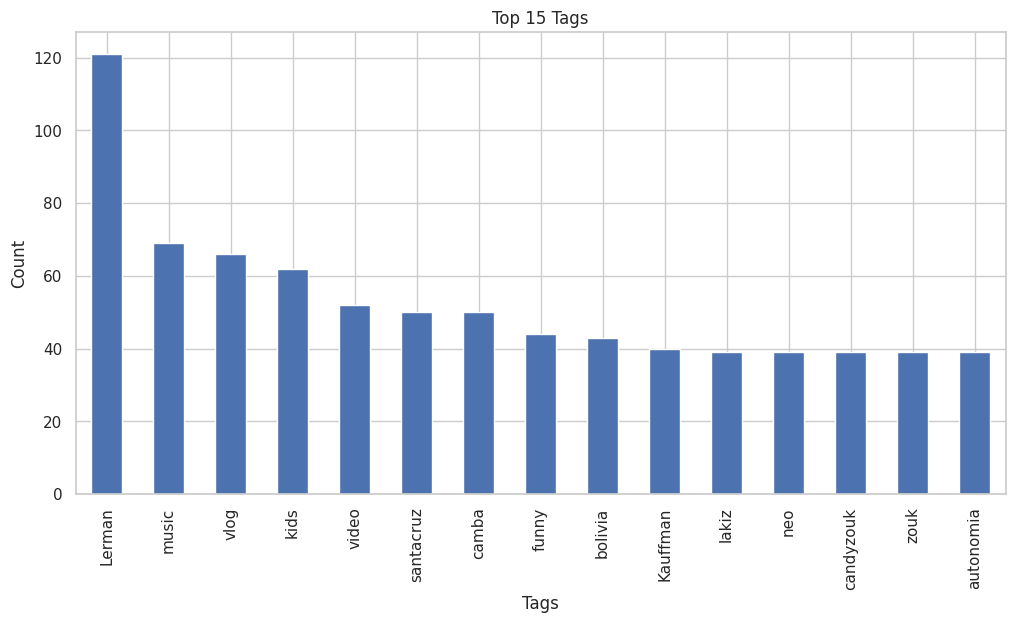

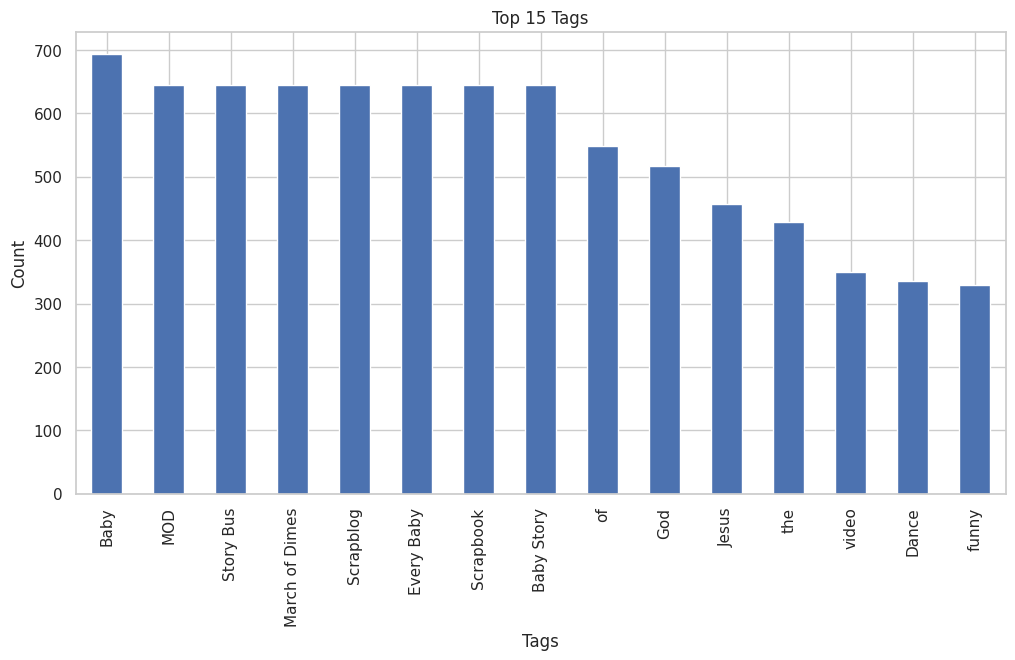

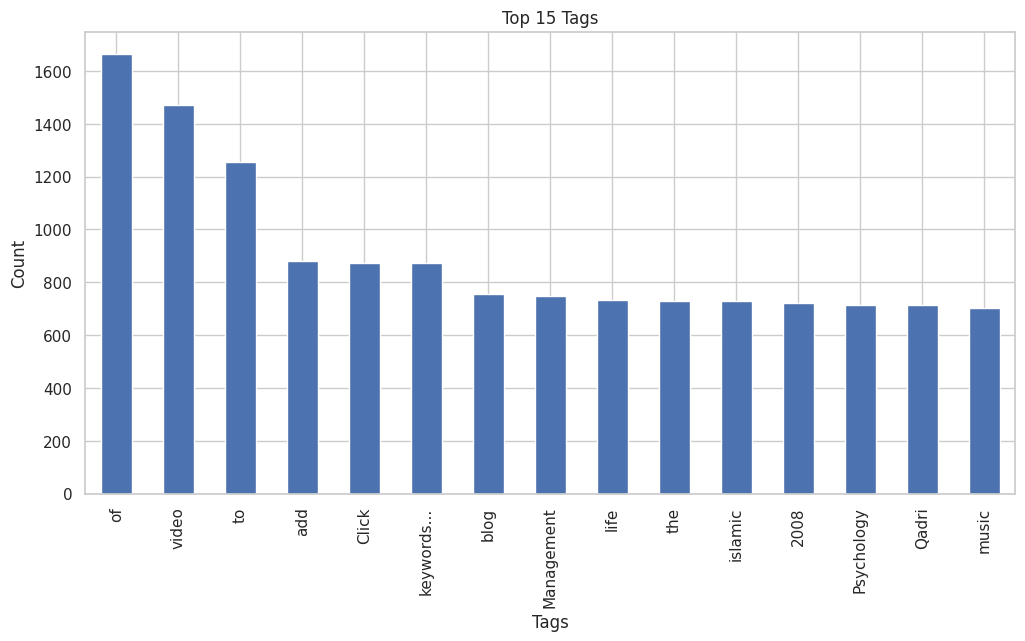

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


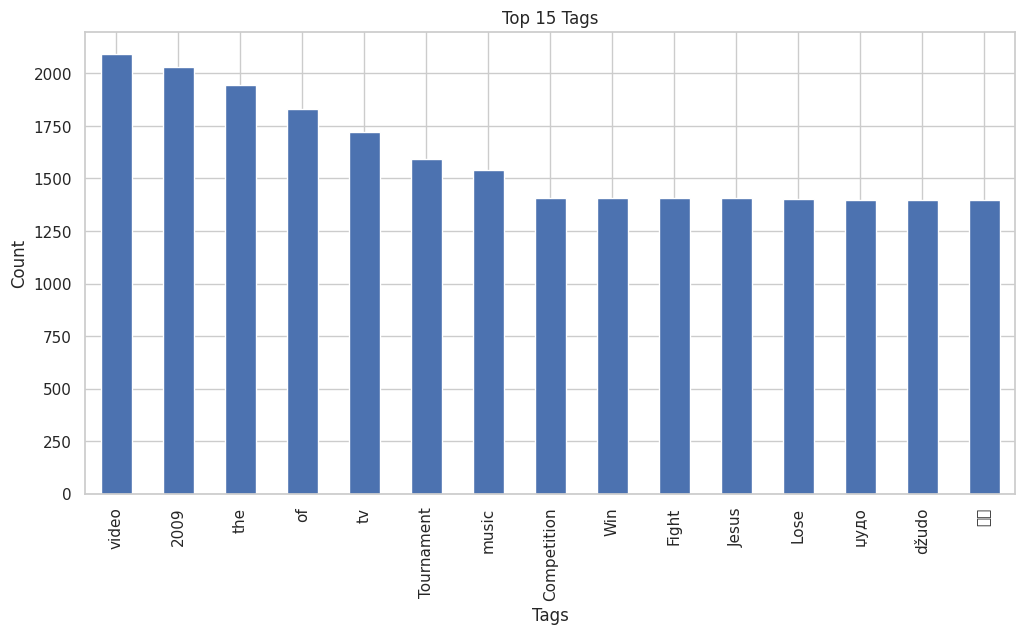

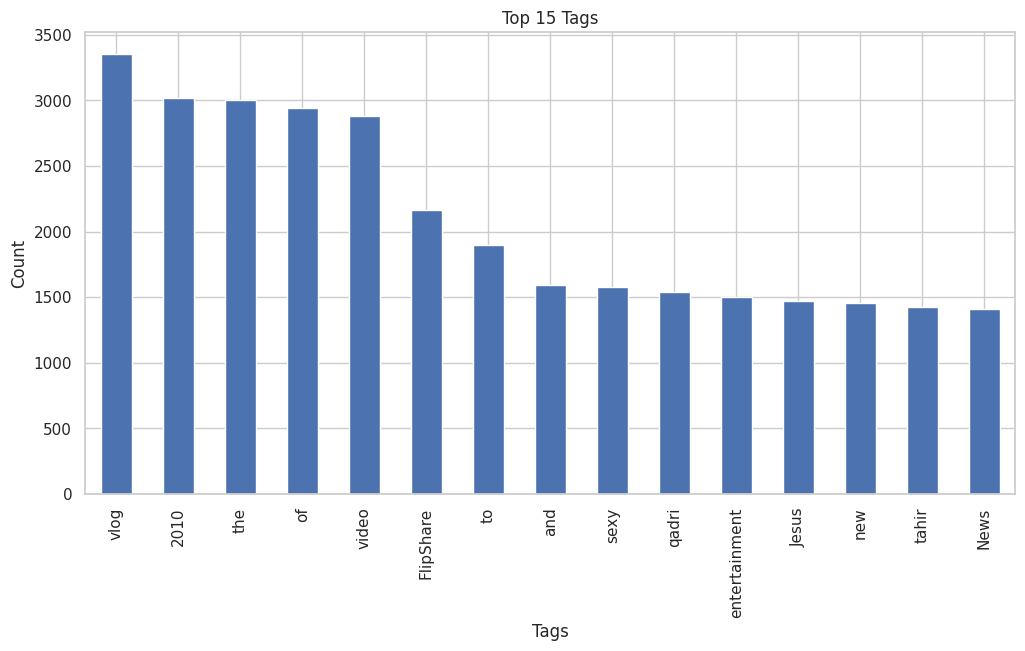

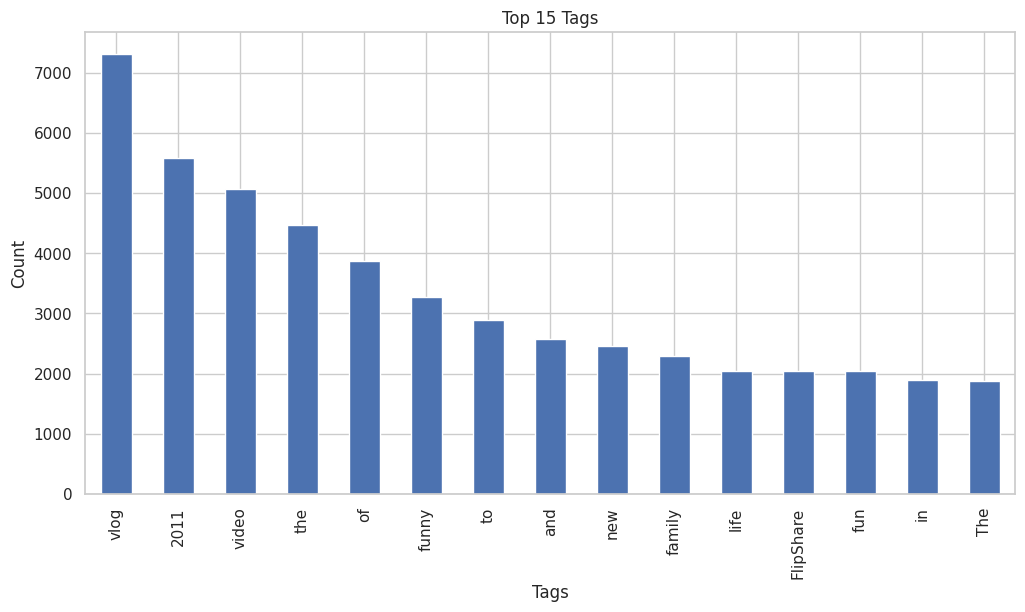

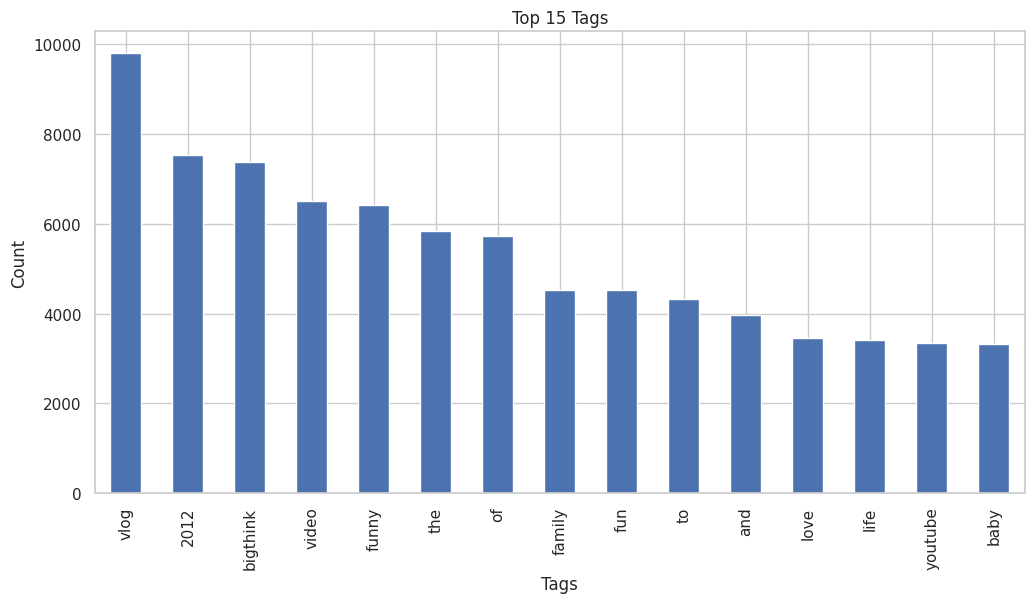

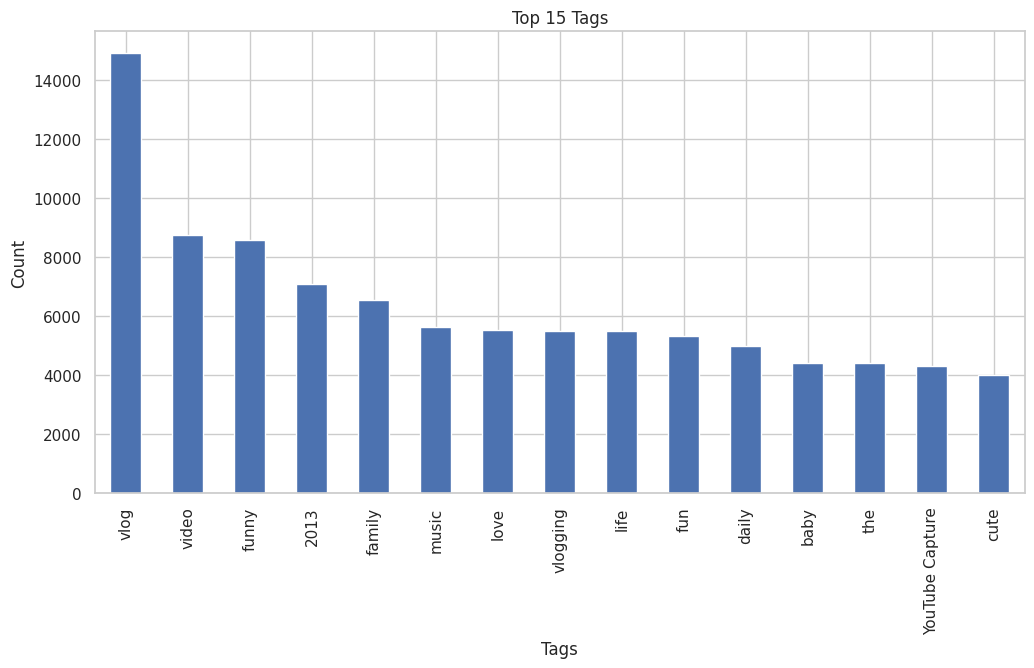

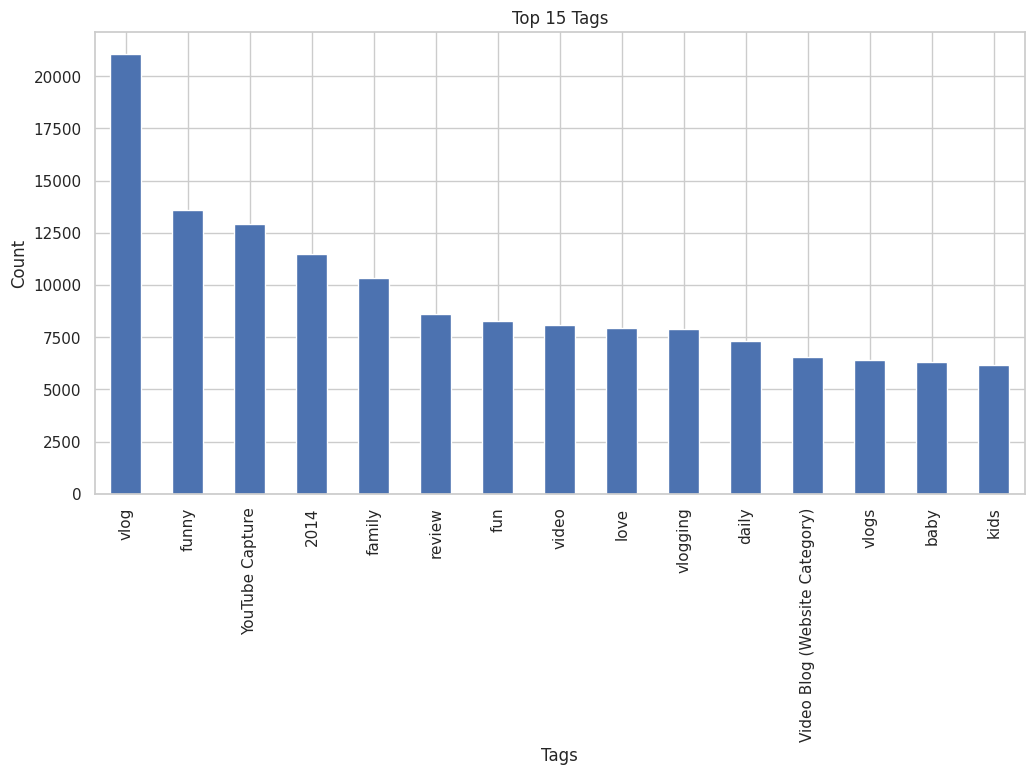

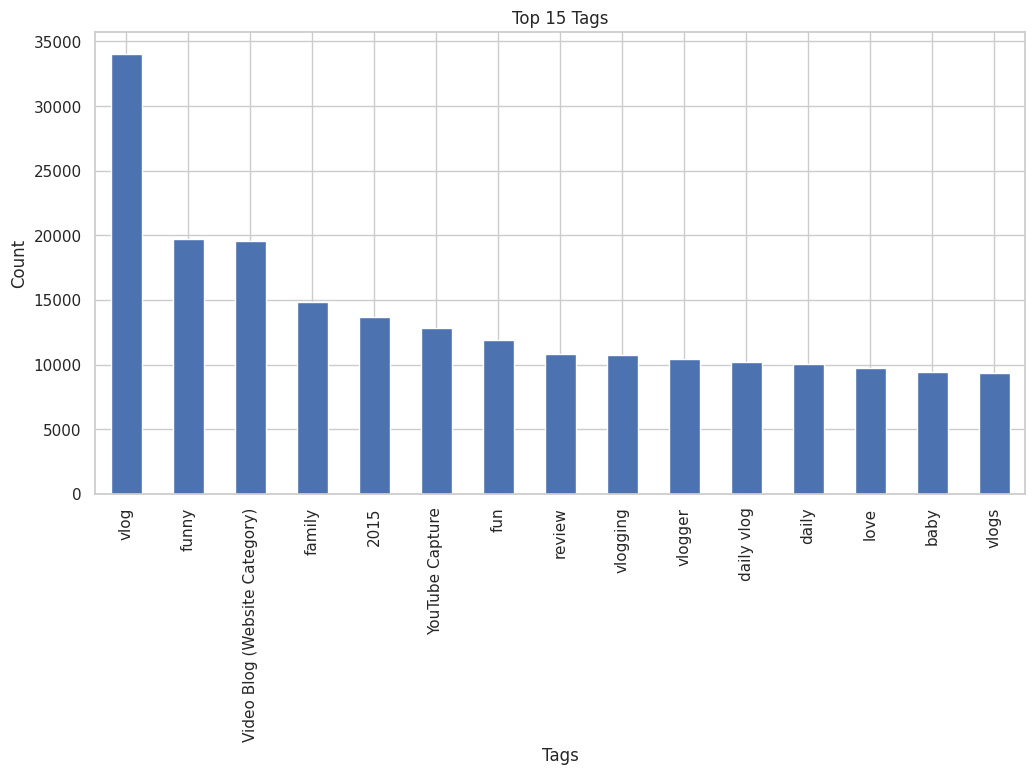

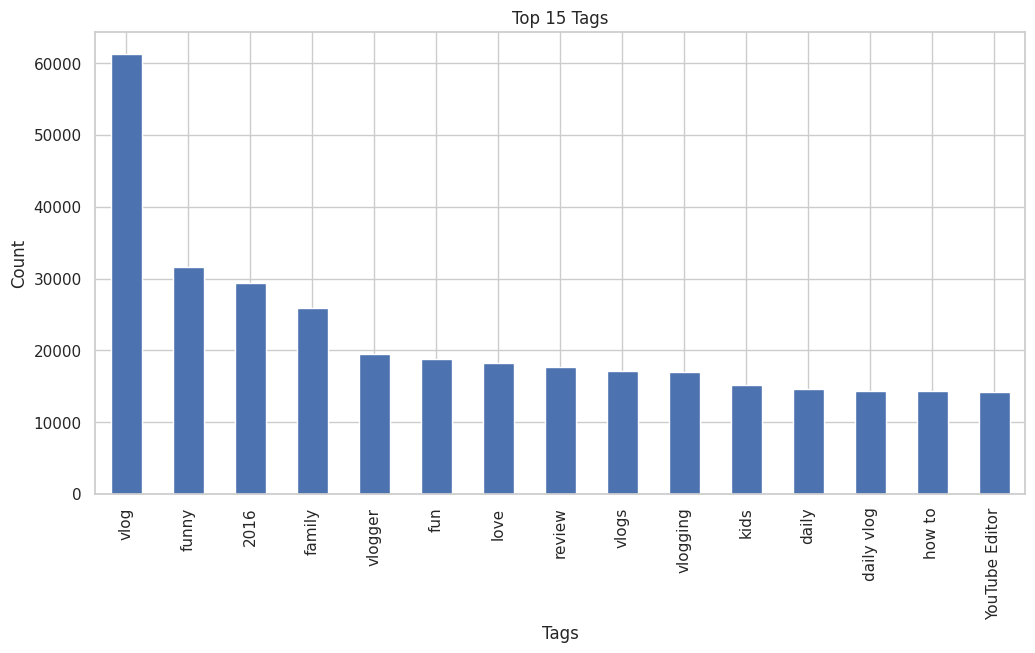

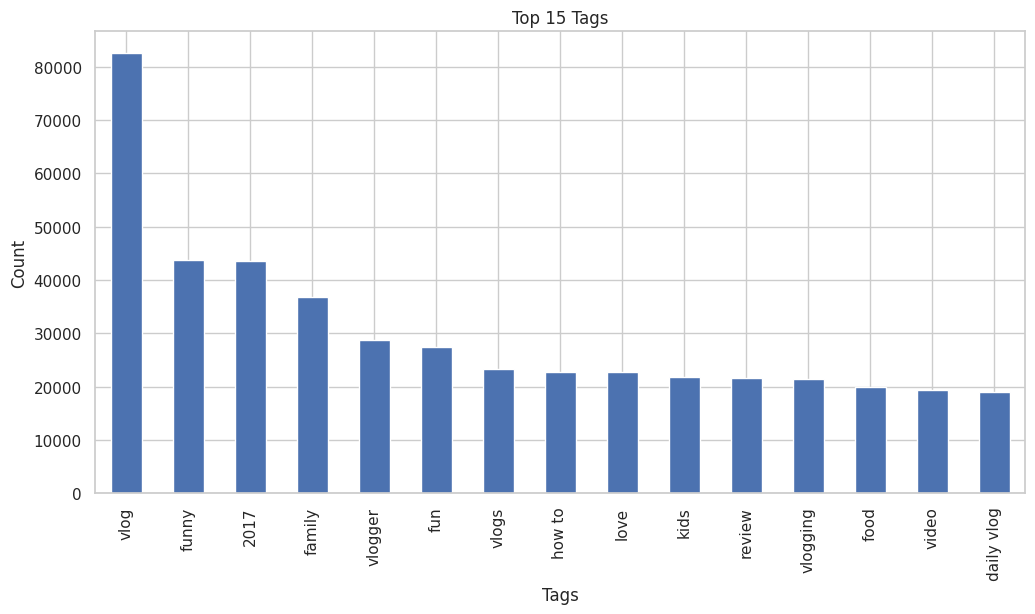

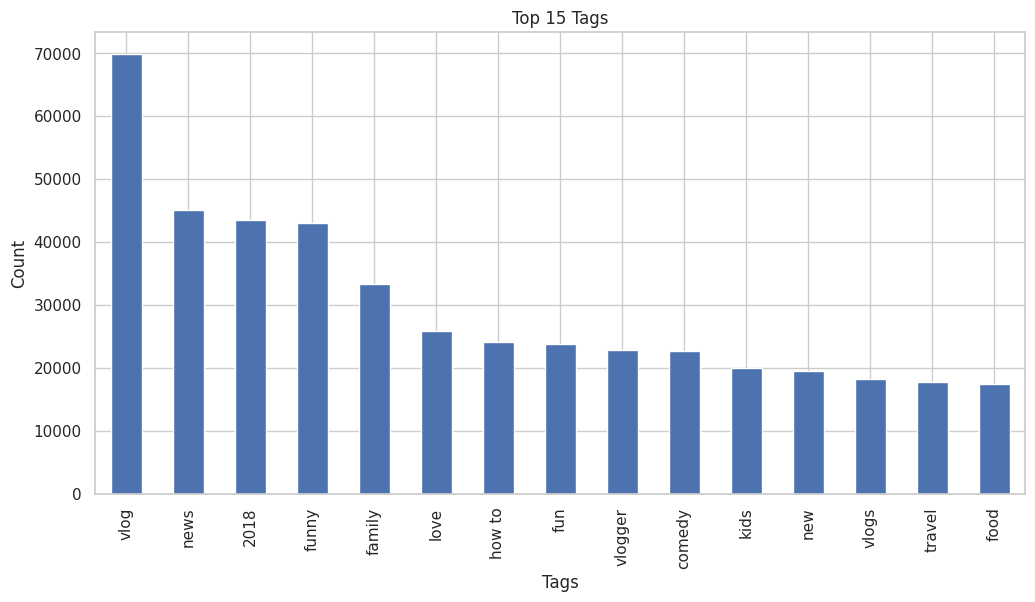

In [29]:
years = range(2006, 2019)  # or whatever years are applicable
for year in years:
    yt_metadata_filt_year = yt_metadata_filtered[yt_metadata_filtered['upload_date'].dt.year == year]
    if not yt_metadata_filt_year.empty:
        try:
            # Assuming the function plot_topN_tag is correctly defined and can handle cases with less than N tags
            plt.figure(figsize=(12, 6))  # Creating a figure with a specific size
            plot_topN_tag(yt_metadata_filt_year['tags'], 15)
        except Exception as e:
            print(f"An error occurred for year {year}: {e}")
    else:
        print(f"No data available for year {year}")

### What insights can be gained from the evolution of Vlog videos within "People & Blogs" over time (considering factors such as length, views, likes, dislikes, and comments)?

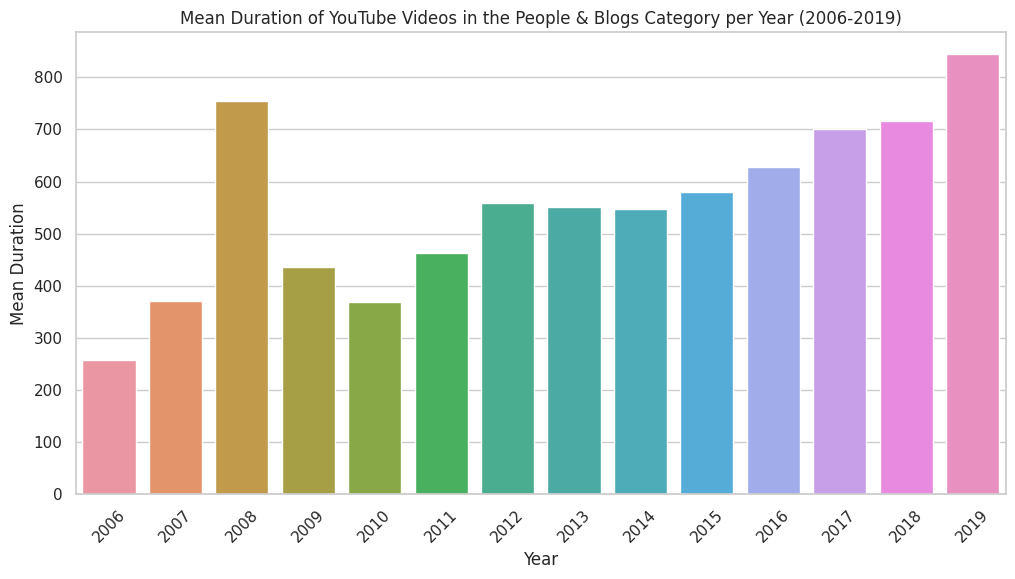

In [13]:
df_duration = yt_metadata_filtered.groupby('yearNumber')['duration'].mean().reset_index()

# Rename the columns for clarity
df_duration.columns = ['Year', 'Mean Duration']

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Mean Duration', data=df_duration)
plt.xticks(rotation=45)
plt.title('Mean Duration of YouTube Videos in the People & Blogs Category per Year (2006-2019)')
plt.show()

### How did Youtube channels morphing either into or out of the People & Blogs categories fare after the transition ? E.g. how was a channel's popularity affected after migrating from Gaming to Vlog ?